In [1]:

# import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from IPython.display import display, Markdown, clear_output
import fidle.pwk as ooo
from importlib import reload
import modele_fit as mf
from pathos.multiprocessing import ProcessingPool as Pool
from math import ceil
from time import sleep
from mpl_toolkits import mplot3d
import tensorflow as tf
import datetime
#ooo.init()



In [42]:
if __name__ == '__main__':
    nb_threads = 10 # number of proc that can work in parallel
    work_list=[] # argument list of the fonction that is going to run in parallel
    for i in range (0,1000): # generate work list
        work_list.append(['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers_averaged.csv',0.8, (5,), ['Zr_at','Nb_at','Mo_at','Ti_at','Cr_at'], ['E (GPa)','H (GPa)','stdE (GPa)','stdH (GPa)'],2,[20,20],4,['relu','relu'],'rmsprop','mse',['mse','mae'], 500])

    nb_batch = ceil(len(work_list)/ nb_threads) # batch: group of nb_thread that are going to be run
    #print(nb_batch)
    tasks_lists = []
    for i in range(nb_batch): # group the work list element per batch
        tasks_list = [] # correspond to the arguments of the function thatare ging to be run in parallel in batch i
        for args in work_list[nb_threads*i:nb_threads*(i+1)]:
            tasks_list.append(args)
            #print(tasks_lists)
        tasks_lists += [tasks_list]  #list of list 
    list_loss=[]
    list_mae=[]
    list_mse=[]
    for i in range(nb_batch):
        print("batch en cours:" + str(i))
        pool = Pool(process=1)
        #print(tasks_lists[i])
        score=pool.map(mf.regression, tasks_lists[i])
        #print(score)
        for j in range (nb_threads):
            list_loss.append(score[j][0])
            list_mae.append(score[j][1])
            list_mse.append(score[j][2])
           
            

batch en cours:0
batch en cours:1
batch en cours:2
batch en cours:3
batch en cours:4
batch en cours:5
batch en cours:6
batch en cours:7
batch en cours:8
batch en cours:9
batch en cours:10
batch en cours:11
batch en cours:12
batch en cours:13
batch en cours:14
batch en cours:15
batch en cours:16
batch en cours:17
batch en cours:18
batch en cours:19
batch en cours:20
batch en cours:21
batch en cours:22
batch en cours:23
batch en cours:24
batch en cours:25
batch en cours:26
batch en cours:27
batch en cours:28
batch en cours:29
batch en cours:30
batch en cours:31
batch en cours:32
batch en cours:33
batch en cours:34
batch en cours:35
batch en cours:36
batch en cours:37
batch en cours:38
batch en cours:39
batch en cours:40
batch en cours:41
batch en cours:42
batch en cours:43
batch en cours:44
batch en cours:45
batch en cours:46
batch en cours:47
batch en cours:48
batch en cours:49
batch en cours:50
batch en cours:51
batch en cours:52
batch en cours:53
batch en cours:54
batch en cours:55
ba

(array([ 15., 113., 243., 269., 200.,  93.,  44.,  16.,   4.,   3.]),
 array([ 12.984121,  23.434916,  33.885708,  44.336502,  54.787296,
         65.23809 ,  75.68888 ,  86.13968 ,  96.59047 , 107.04127 ,
        117.49206 ], dtype=float32),
 <a list of 10 Patch objects>)

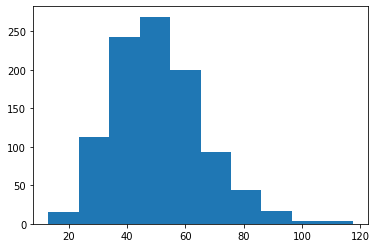

In [43]:
plt.hist(list_mae)

In [44]:
moy=np.mean(list_mae)
std=np.std(list_mae)

In [45]:
print(moy)
print(std)

50.68942
15.450853


(array([ 10.,  59., 148., 240., 235., 165.,  90.,  32.,  19.,   2.]),
 array([2.1738336, 2.4254785, 2.6771235, 2.9287686, 3.1804135, 3.4320583,
        3.6837034, 3.9353485, 4.1869936, 4.438638 , 4.6902833],
       dtype=float32),
 <a list of 10 Patch objects>)

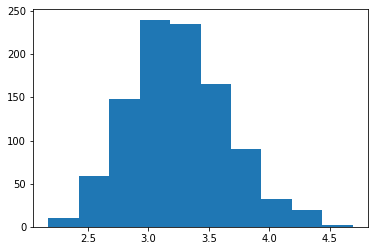

In [46]:
plt.hist(list_mse)

In [3]:
if __name__ == '__main__':
    nb_threads = 1 # number of proc that can work in parallel
    work_list=[] # argument list of the fonction that is going to run in parallel
         
        # generate work list
   
    for nb_layer in range(1,4):
        for nb_neurones in range (1,21):
            list_neurones=np.ones(nb_layer)*nb_neurones
            list_neurones=[int(x) for x in list_neurones]
            list_act=[]
            for h in range(nb_layer):
                list_act.append('relu')
            work_list.append(['A:/BASE DE DONNEES/Nanoindentation/Python_extrac/Data_without_outliers_averaged.csv',0.8, (5,), ['Zr_at','Nb_at','Mo_at','Ti_at','Cr_at'], ['E (GPa)','H (GPa)','stdE (GPa)','stdH (GPa)'],nb_layer,list_neurones,4,list_act,'rmsprop','mse',['mse','mae'], 100])
    print(len(work_list))         
    nb_batch = ceil(len(work_list)/ nb_threads) # batch: group of nb_thread that are going to be run
    print(nb_batch)
    tasks_lists = []
    for i in range(nb_batch): # group the work list element per batch
        tasks_list = [] # correspond to the arguments of the function that are ging to be run in parallel in batch i
        for args in work_list[nb_threads*i:nb_threads*(i+1)]:
            tasks_list.append(args)
            #print(tasks_lists)
        tasks_lists += [tasks_list]  #list of list 
    list_loss=[]
    list_mae=[]
    list_mse=[]
    for i in range(nb_batch):
        print("batch en cours:" + str(i))
        pool = Pool(process=1)
        #print(tasks_lists[i])
        score= pool.map(mf.regression, tasks_lists[i])
        print(score)
        for j in range (nb_threads):
            list_loss.append(score[j][0])
            list_mae.append(score[j][1])
            list_mse.append(score[j][2])

60
60
batch en cours:0
[[7310.1921985554245, 7310.1924, 42.75556]]
batch en cours:1


KeyboardInterrupt: 

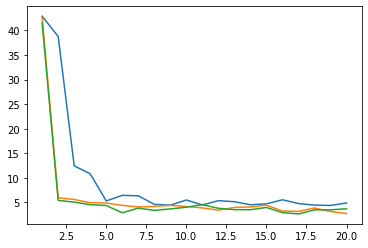

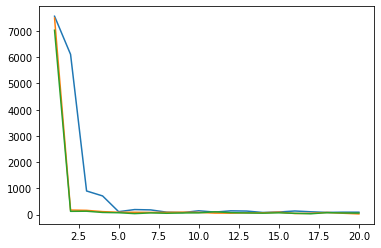

In [46]:
fig = plt.figure()
#ax = plt.axes(projection='3d')
list_layers=[]
list_neurones=[]
    
plt.plot(range(1,21),list_mse[0:20])
plt.plot(range(1,21),list_mse[20:40])
plt.plot(range(1,21),list_mse[40:60])
plt.show()

plt.plot(range(1,21),list_mae[0:20])
plt.plot(range(1,21),list_mae[20:40])
plt.plot(range(1,21),list_mae[40:60])
plt.show()


20